In [ ]:
import numpy as np
import sklearn
import pandas as pd

In [ ]:
df=pd.read_csv("Crime_Data_2010_2017.csv")

In [ ]:
df["Location "].head(10)

0    (33.9829, -118.3338)
1    (34.0454, -118.3157)
2     (33.942, -118.2717)
3    (33.9572, -118.2717)
4    (34.2009, -118.6369)
5    (34.0591, -118.2412)
6    (34.1211, -118.2048)
7     (34.241, -118.3987)
8    (34.3147, -118.4589)
9    (34.2012, -118.4662)
Name: Location , dtype: object

In [ ]:
df.describe()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4
count,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.584316e+06,1.455657e+06,1.584240e+06,524757.000000,1.584309e+06,99997.000000,2183.000000,69.000000
mean,1.358072e+08,1.363975e+03,1.115232e+01,1.161595e+03,5.069982e+02,3.593419e+01,3.124071e+02,370.568852,5.068795e+02,954.461614,970.715529,967.173913
std,2.259098e+07,6.467544e+02,5.986703e+00,5.986644e+02,2.105490e+02,1.681156e+01,2.102334e+02,114.024156,2.104662e+02,123.611988,88.350046,97.571536
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,1.000000e+01,1.010000e+02,101.000000,1.100000e+02,121.000000,93.000000,421.000000
25%,1.121176e+08,9.300000e+02,6.000000e+00,6.450000e+02,3.300000e+02,2.300000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000
50%,1.401095e+08,1.430000e+03,1.200000e+01,1.204000e+03,4.400000e+02,3.400000e+01,2.100000e+02,400.000000,4.400000e+02,998.000000,998.000000,998.000000
75%,1.520186e+08,1.900000e+03,1.600000e+01,1.676000e+03,6.260000e+02,4.800000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000
max,9.102204e+08,2.359000e+03,2.100000e+01,2.198000e+03,9.560000e+02,9.900000e+01,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000


In [ ]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   DR Number               1584316 non-null  int64  
 1   Date Reported           1584316 non-null  object 
 2   Date Occurred           1584316 non-null  object 
 3   Time Occurred           1584316 non-null  int64  
 4   Area ID                 1584316 non-null  int64  
 5   Area Name               1584316 non-null  object 
 6   Reporting District      1584316 non-null  int64  
 7   Crime Code              1584316 non-null  int64  
 8   Crime Code Description  1583904 non-null  object 
 9   MO Codes                1412557 non-null  object 
 10  Victim Age              1455657 non-null  float64
 11  Victim Sex              1439117 non-null  object 
 12  Victim Descent          1439084 non-null  object 
 13  Premise Code            1584240 non-null  float64
 14  Pr

In [ ]:
crime_codes=dict(zip(df["Crime Code"],df["Crime Code Description"]))
area=dict(zip(df["Area ID"],df["Area Name"]))
premise=dict(zip(df["Premise Code"],df["Premise Description"]))

In [ ]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [ ]:
df2=df[["Time Occurred","Area ID", "Reporting District", "Crime Code", "Victim Age", "Victim Sex", \
      "Victim Descent", "Premise Code", "Location "]]
df2["location_x"]=pd.Series(index=df.index)#df["Location "]
df2["location_y"]=pd.Series(index=df.index)#df["Location "]

C:\Users\ashut\AppData\Local\Temp\ipykernel_13972\3345610594.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2["location_x"]=pd.Series(index=df.index)#df["Location "]
C:\Users\ashut\AppData\Local\Temp\ipykernel_13972\3345610594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["location_x"]=pd.Series(index=df.index)#df["Location "]
C:\Users\ashut\AppData\Local\Temp\ipykernel_13972\3345610594.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2["location_y"]=pd.Series(index=df.index)#df["Location "]
C:\

In [ ]:
def func_x(val):
    if val == "":
        return 0.0
    return val.strip("() ").split()[0].strip(" ,")

def func_y(val):
    if val == "":
        return 0.0
    
    return val.strip("() ").split()[1].strip(" ,")
df2["Location "].fillna("(0.0, 0.0)")
df2["Location "]=df2["Location "].replace(np.nan,"(0.0, 0.0)")
ser=df2["Location "].apply(func_x)
df2["location_x"]=ser
ser=df2["Location "].apply(func_y)
df2["location_y"]=ser

df2["location_x"]=pd.to_numeric(df2["location_x"])
df2["location_y"]=pd.to_numeric(df2["location_y"])

C:\Users\ashut\AppData\Local\Temp\ipykernel_13972\273787779.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Location "]=df2["Location "].replace(np.nan,"(0.0, 0.0)")
C:\Users\ashut\AppData\Local\Temp\ipykernel_13972\273787779.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["location_x"]=ser
C:\Users\ashut\AppData\Local\Temp\ipykernel_13972\273787779.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [ ]:
df2=df2.drop("Location ",axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Time Occurred       1584316 non-null  int64  
 1   Area ID             1584316 non-null  int64  
 2   Reporting District  1584316 non-null  int64  
 3   Crime Code          1584316 non-null  int64  
 4   Victim Age          1455657 non-null  float64
 5   Victim Sex          1439117 non-null  object 
 6   Victim Descent      1439084 non-null  object 
 7   Premise Code        1584240 non-null  float64
 8   location_x          1584316 non-null  float64
 9   location_y          1584316 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 120.9+ MB


In [ ]:
df2["Premise Code"]=df2["Premise Code"].replace(np.nan,0.0)
df2["Premise Code"]=df2["Premise Code"].fillna(0.0)
df2["Victim Sex"]=df2["Victim Sex"].fillna('-')
df2["Victim Age"]=df2["Victim Age"].fillna(df2["Victim Age"].mean())
df2["Victim Descent"]=df2["Victim Descent"].fillna('-')
df2.isna().sum().sum()

0

In [ ]:
# columns to be used - Time Occurred(int), Area ID(categorical), 
# crime code (138 categorical), Victim Age(int), Victim Sex(categorical), Victim Descent(categorical),
# Location (tuple of floating point numbers)

In [ ]:
df2["Area ID"]=df2["Area ID"].astype(str)
df2["Reporting District"]=df2["Reporting District"].astype(str)
df2["Crime Code"]=df2["Crime Code"].astype(str)
df2["Premise Code"]=df2["Premise Code"].astype(str)

In [ ]:
df2.head()

,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,location_x,location_y
0,1800,12,1241,626,30.000000,F,W,502.0,33.9829,-118.3338
1,2300,20,2071,510,35.934195,-,-,101.0,34.0454,-118.3157
2,2030,18,1823,510,12.000000,-,-,101.0,33.9420,-118.2717
3,1800,18,1803,510,35.934195,-,-,101.0,33.9572,-118.2717
4,2300,21,2133,745,84.000000,M,W,501.0,34.2009,-118.6369


In [ ]:
final_df=df2[['Time Occurred', 'Area ID', 'Crime Code',
       'Victim Age', 'Victim Sex', 'Victim Descent',
       'location_x', 'location_y']]

In [ ]:
#given time, area,age,sex,descent,location coordinates, we predict the possible crime a person will be exposed to
from sklearn.model_selection import train_test_split
df_X_cat=pd.get_dummies(final_df[['Area ID','Victim Sex', 'Victim Descent']])
df_Y=final_df['Crime Code']
df_X_val=final_df[['Time Occurred', 'Victim Age', 'location_x', 'location_y']]
df_X=pd.concat([df_X_cat, df_X_val], axis=1, join='inner')

In [ ]:
X=df_X.to_numpy()
y=df_Y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state=80, shuffle=True)

In [ ]:
from sklearn import linear_model

In [ ]:
clf = linear_model.RidgeClassifier().fit(x_train, y_train)
clf.score(x_test,y_test)

0.21039625833165018

In [ ]:
clf2 = linear_model.LogisticRegression(random_state=0,max_iter=50).fit(x_train, y_train)
clf2.score(x_test, y_test)

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.13090789739446576

In [ ]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(random_state=1, max_iter=30).fit(x_train, y_train)
clf3.score(x_test, y_test)

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


0.23550166633003433

In [ ]:
from sklearn import tree
clf4 = tree.DecisionTreeClassifier()
clf4.fit(x_train, y_train)
clf4.score(x_test,y_test)

0.18653744193092306

In [ ]:
from sklearn import svm
lin_clf = svm.LinearSVC(max_iter=1,verbose=1) # reduced iterations because higher iterations take a lot of time
lin_clf.fit(x_train, y_train)
lin_clf.score(x_test,y_test)

[LibLinear]

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.10529438497273279

In [ ]:
from sklearn.linear_model import SGDClassifier
clf5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf5.fit(x_train, y_train)
clf5.score(x_test,y_test)

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.04958594223389214

In [ ]:
clf5.predict(x_test)

array(['442', '442', '442', ..., '442', '442', '442'], dtype='<U3')

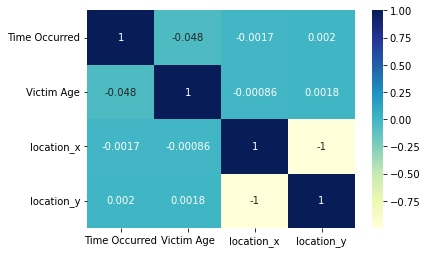

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dataplot = sns.heatmap(final_df.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [ ]:
!pip install gradio

  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=058dc35c10da079b103b2f1ff3d467f75253f38d7b925059f10a3b48f59286b4
  Stored in directory: c:\users\ashut\appdata\local\pip\cache\wheels\91\e2\96\f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=75252aa0ce8c89f781c0ada9156fb9945a805ef6bf70e1ec06562186b1ad102a
  Stored in directory: c:\users\ashut\appdata\local\pip\cache\wheels\fe\04\d1\a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart


In [ ]:
df_X.columns

Index(['Area ID_1', 'Area ID_10', 'Area ID_11', 'Area ID_12', 'Area ID_13',
       'Area ID_14', 'Area ID_15', 'Area ID_16', 'Area ID_17', 'Area ID_18',
       'Area ID_19', 'Area ID_2', 'Area ID_20', 'Area ID_21', 'Area ID_3',
       'Area ID_4', 'Area ID_5', 'Area ID_6', 'Area ID_7', 'Area ID_8',
       'Area ID_9', 'Victim Sex_-', 'Victim Sex_F', 'Victim Sex_H',
       'Victim Sex_M', 'Victim Sex_X', 'Victim Descent_-', 'Victim Descent_A',
       'Victim Descent_B', 'Victim Descent_C', 'Victim Descent_D',
       'Victim Descent_F', 'Victim Descent_G', 'Victim Descent_H',
       'Victim Descent_I', 'Victim Descent_J', 'Victim Descent_K',
       'Victim Descent_L', 'Victim Descent_O', 'Victim Descent_P',
       'Victim Descent_S', 'Victim Descent_U', 'Victim Descent_V',
       'Victim Descent_W', 'Victim Descent_X', 'Victim Descent_Z',
       'Time Occurred', 'Victim Age', 'location_x', 'location_y'],
      dtype='object')

In [ ]:
cols2=list(df_X.columns)
cols=[1,10,11,12,13,14,15,16,17,18,19,2,20,21,3,4,5,6,7,8,9,\
     '-','F','H','M','X','-','A','B','C','D','F','G','H','I','J','K','L','O','P','S','U','V','W','X','Z','time','age','x','y']

In [ ]:
import gradio as gr

def greet(time,area_id,age,sex,descent,x,y):
    time=int(time)
    area_id=int(area_id)
    age=float(age)
    x=float(x)
    y=float(y)
    cols=[1,10,11,12,13,14,15,16,17,18,19,2,20,21,3,4,5,6,7,8,9,\
     '-','F','H','M','X','-','A','B','C','D','F','G','H','I','J','K','L','O','P','S','U','V','W','X','Z','time','age','x','y']
    cols=(cols)
    a=([0.0]*len(cols))
    
    id_=cols.index(area_id)
    a[id_]=1
    
    if sex == "-":
        a[21]=1
    else:
        id_=cols[21:26].index(sex)
        a[id_]=1
        
    if descent == "-":
        a[26]=1
    else:
        id_=cols[26:-4].index(descent)
        a[id_]=1
    a[-1]=y
    a[-2]=x
    a[-3]=age
    a[-4]=time
    
    a=np.expand_dims(np.array(a),axis=0)
        
    return np.array(clf.predict(a)).item()

demo = gr.Interface(fn=greet, inputs=["text","text","text","text","text","text","text"], outputs="text")

demo.launch()

Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.
